# Sales Prediction
## `(Linear Regression Model and Analysis)`


### Summary

Building a model which predicts sales based on the money spent on different platforms for marketing.

Using the advertising dataset and analyse the relationship between marketing plartform(independent variables) and 'sales'(dependent variable) using linear regression model.

The linear `regression` model to predict `Sales` using an appropriate predictor variable.

In [43]:
#import important libraries for this project
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [44]:
# reading the CSV file into a dataFrame
df = pd.read_csv(r"C:\Users\Admin\Documents\Documents\Books\My important documents\Python\Projects\Modeling\sales-prediction-simple-linear-regression dataset.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Data Inspection and Data Cleaning

In [45]:
df.shape

(200, 4)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [64]:
#Looking data descriptors(descriptive stats) of a data variables
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [48]:
# Checking Null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [63]:
#ooking for any dupliced rows
df.duplicated().sum()

0

## Exploratory Data Analysis

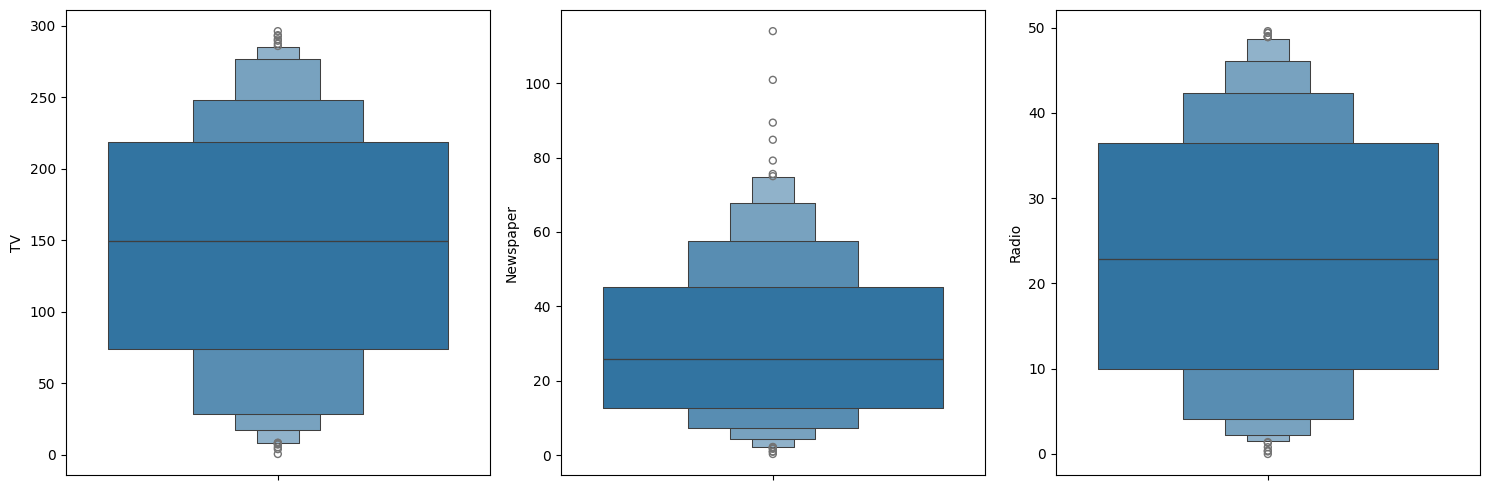

In [50]:
# Create subplots of boxen plot to find outlier in my data variables

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  

sns.boxenplot(y=df['TV'], ax=axs[0])  
sns.boxenplot(y=df['Newspaper'], ax=axs[1])  
sns.boxenplot(y=df['Radio'], ax=axs[2])  

plt.tight_layout()  
plt.show()  

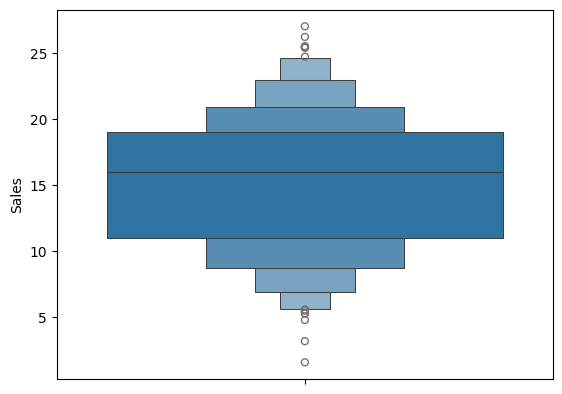

In [51]:
#Boxen plot for the dependent variable
sns.boxenplot(df['Sales'])
plt.show()

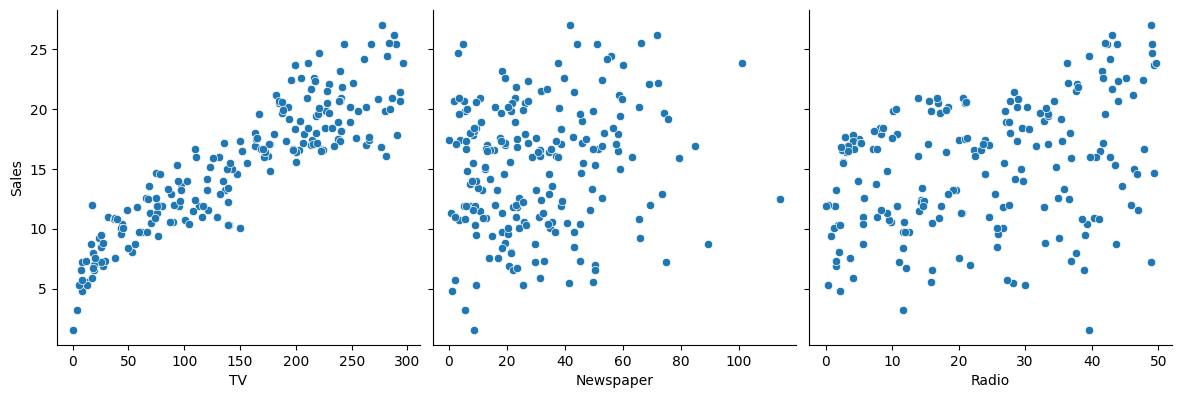

In [52]:
# Sales are relatioship with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

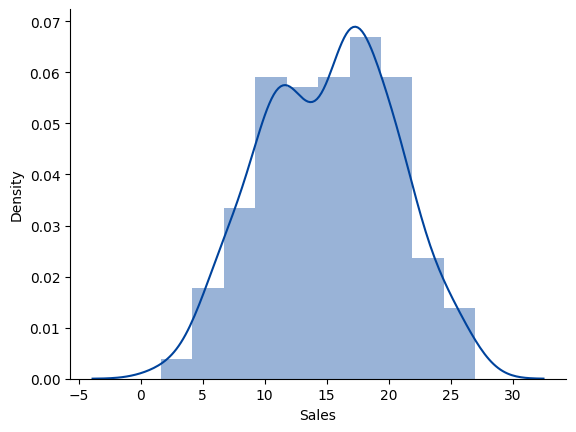

In [53]:
#didtribution of the Sales which is almost close to Normal
sns.distplot(df['Sales'], color= "#00439c")
sns.despine()
plt.show() 

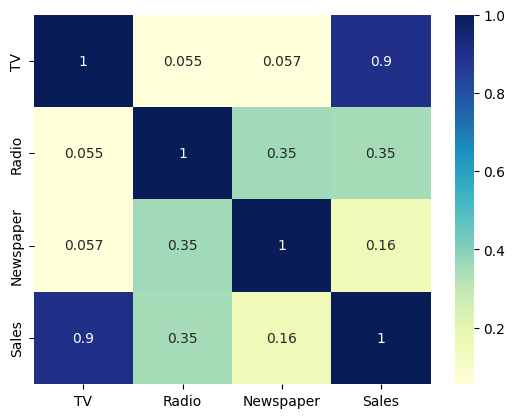

In [54]:
# correlation between different variables and potential multi-colinearity on our independent variables
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Model Building

## $y(sales) = b_0 + bx(tv) + bx(radio) + bx(newspaper)$

In [55]:
#creating a data frame for Y(dependent) and X(independent) variabes
y = df['Sales']
X = df[['TV','Newspaper','Radio']]

In [56]:
#Perfoming a cross validation of a train_test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [57]:
# fitting OLS model using training data (X_train_sm and y_train)
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

print(model.summary(alpha=0.05))



                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     535.5
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           7.01e-82
Time:                        18:51:16   Log-Likelihood:                -303.50
No. Observations:                 160   AIC:                             615.0
Df Residuals:                     156   BIC:                             627.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4192      0.329     13.428      0.0

## Model Summary

Very good `R-squared: 0.911` 
Newspaper with less significance is our model with coef `p_vaue of 0.393` overall the model is stable and looking good all the coef are positive which means the platform have positive contribution toward the `Sales`

### $y(sales) = 4.4192 +   0.0537x(tv) + 0.0054x(newspaper) +  0.1061x(Radio)$


In [58]:
from sklearn.metrics import mean_squared_error

X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

#Since the MSE is 3.3510 the overall model error on average is relatively small

Mean Squared Error: 3.350988721329183


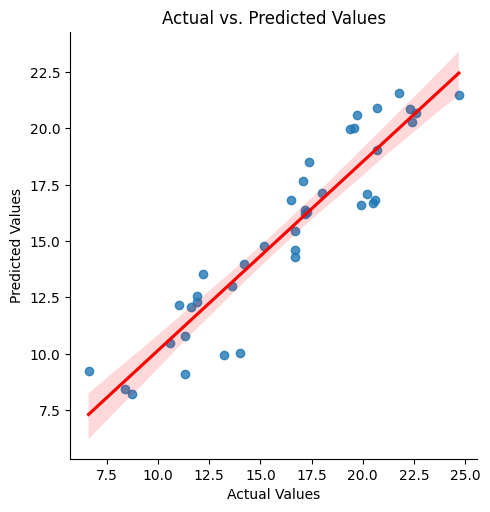

In [59]:
#Plot of actual vs predicted values from test sets
data = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})

sns.lmplot(x='Actual Values', y='Predicted Values', data=data, line_kws={'color': 'red'})

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

plt.show()


#### Distribution of the `error terms`

In [60]:
y_train_pred = model.predict(sm.add_constant(X_train))
res = y_train - y_train_pred

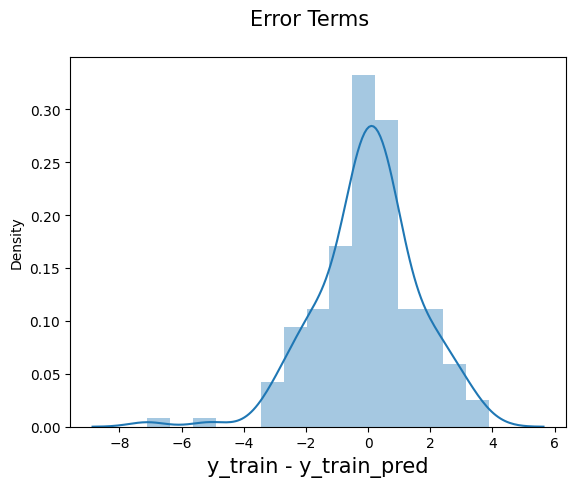

In [61]:
#distribution plot of residuals
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         
plt.show()


The residuals are `normally` distributed with slight skewness to the left but overall it good 